In [1]:
# !pip install diffusers
# !pip install torch
# !pip install transformers
# !pip install accelerate
# !pip install python-dotenv


In [2]:
import requests
import io
from PIL import Image
import os
from dotenv import load_dotenv
load_dotenv()

API_URL = "https://api-inference.huggingface.co/models/stabilityai/stable-diffusion-xl-base-1.0"

def query(payload):
    auth_hf_api_token = os.environ.get("HF_READ_TOKEN")
    authorization = "Bearer " + auth_hf_api_token
    headers = {"Authorization": authorization}
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.content

def generateImage(dish_name, description_of_dish):
    input = "Create a gourmet food picture for " + dish_name + "," + description_of_dish + ",realistic dish"
    image_bytes = query({
        "inputs": input,
    })
    image = Image.open(io.BytesIO(image_bytes))
    return image



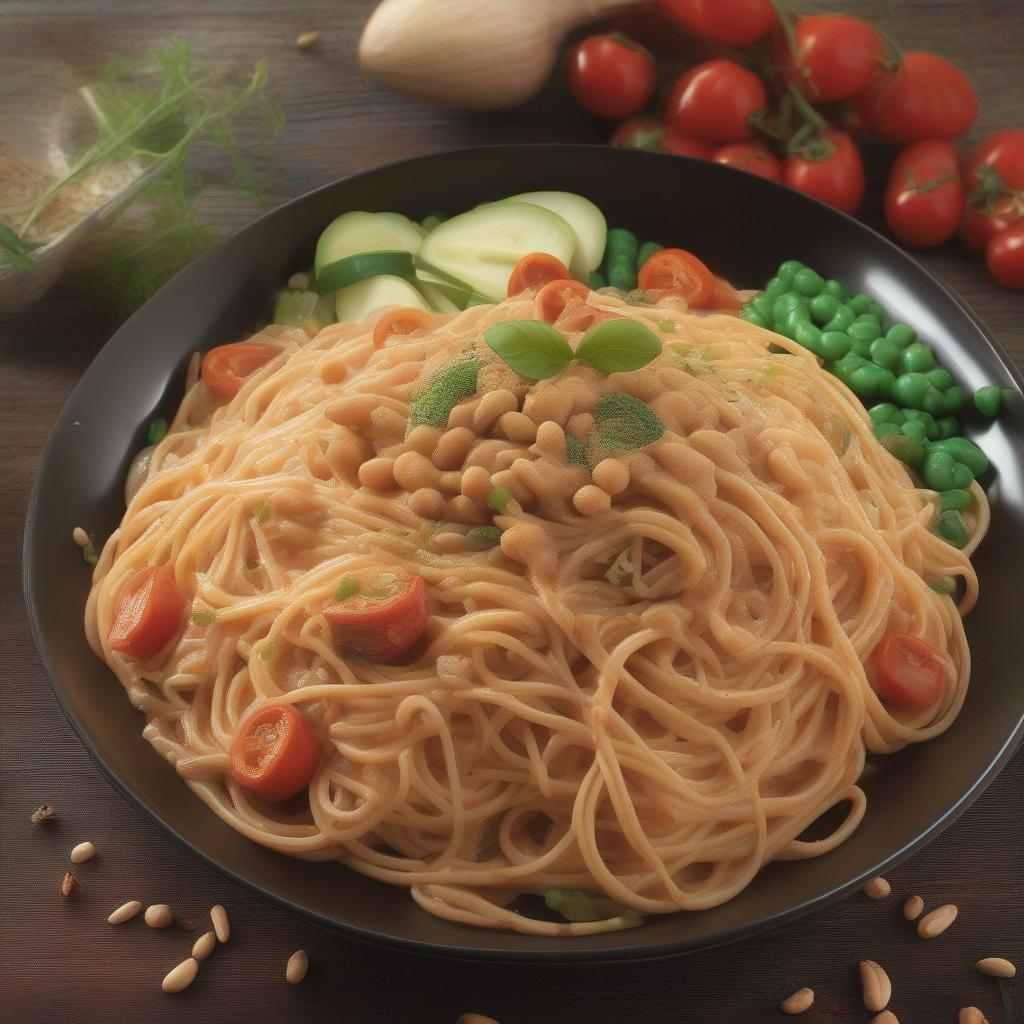

In [3]:
generateImage("Peanut Spaghetti", "Spaghetti with peanut sauce and vegetables")